In [482]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn 
# !pip install matplotlib
# !pip install xgboost
# !pip install scikit-learn
# !pip install scikit-plot
# !pip install scipy

In [483]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score, make_scorer, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [484]:
df=pd.read_csv("Titanic-Dataset.csv")

In [485]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [486]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [487]:
df.drop(["PassengerId","Name","Cabin","Ticket"],inplace=True,axis=1)

In [488]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [489]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [490]:
df.dropna(axis=0,inplace=True)

In [491]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [492]:
df["Embarked"].replace(["C","S","Q"],["Cherbourg","Southampton","Queenstown"])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 889, dtype: object

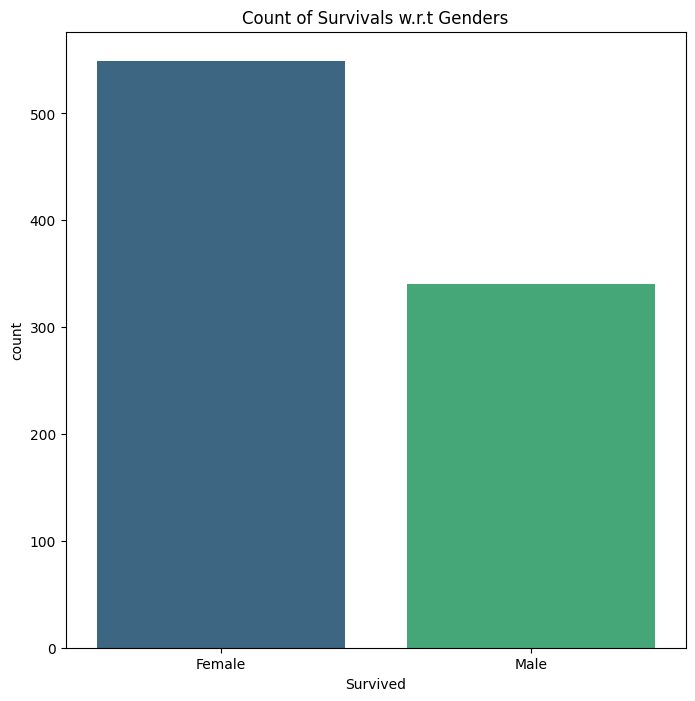

In [493]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Survived",data=df, palette = "viridis")
plt.title("Count of Survivals w.r.t Genders")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

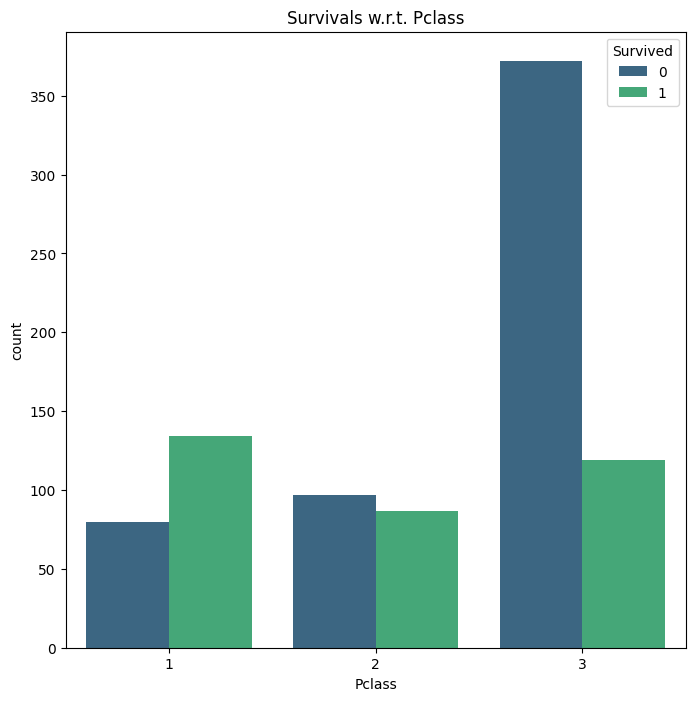

In [494]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Pclass",data=df, hue="Survived",palette="viridis")
plt.title("Survivals w.r.t. Pclass")
plt.show()

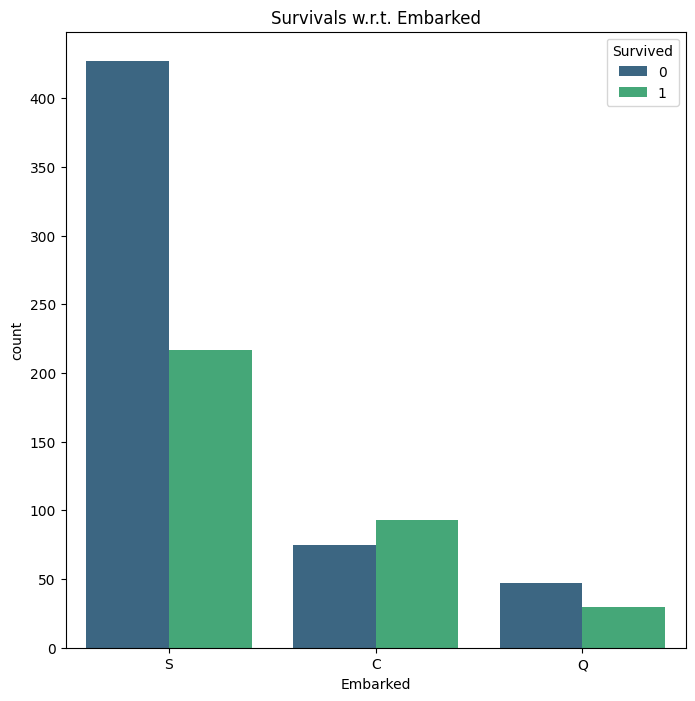

In [495]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Embarked",data=df, hue="Survived",palette="viridis")
plt.title("Survivals w.r.t. Embarked")
plt.show()

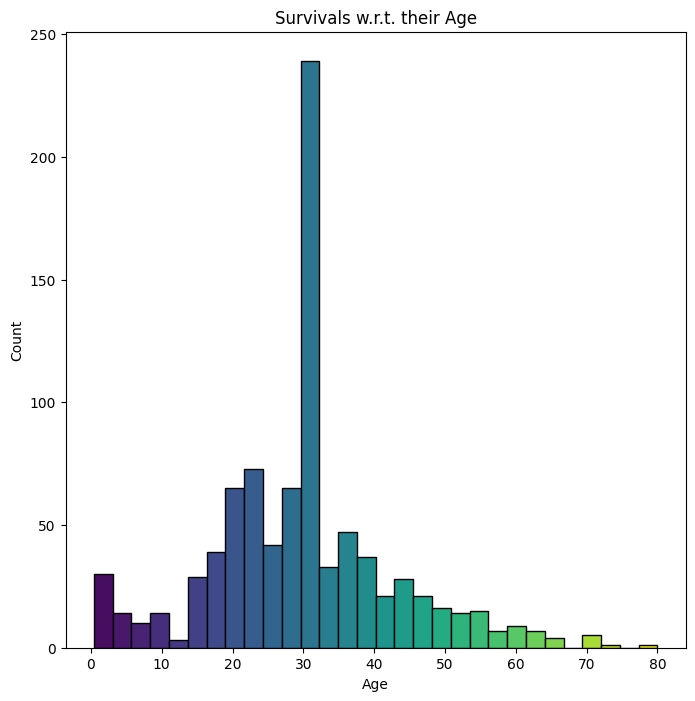

In [496]:
plt.figure(figsize=(8, 8))
hist_data = sns.histplot(x="Age", data=df, bins=30)
patches = hist_data.patches
for patch, color in zip(patches, sns.color_palette("viridis", len(patches))):
    patch.set_facecolor(color)
plt.title("Survivals w.r.t. their Age")
plt.show()


In [497]:
df=pd.get_dummies(df,["sex","Embarked"])

In [498]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [499]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,stratify=y,random_state=0)

In [500]:
#extratree classifier model

In [501]:
ex=ExtraTreesClassifier(n_estimators=110,max_depth=12,random_state=0)
scores=cross_val_score(ex,X_train,y_train,cv=LeaveOneOut(),n_jobs=-1,scoring=make_scorer(f1_score,average="micro"))
print(scores.mean(),scores.std())

0.7958199356913184 0.40310118537109796


In [502]:
ex.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=12, n_estimators=110, random_state=0)

In [503]:
pre=ex.predict(X_test)
print(f1_score(y_test,pre,average="micro"))

0.8426966292134831


In [504]:
#gradient boosting classifier model

In [505]:
gb=GradientBoostingClassifier(n_estimators=50,max_depth=5)
scores=cross_val_score(gb,X_train,y_train,cv=LeaveOneOut(),n_jobs=-1,scoring=make_scorer(f1_score,average="micro"))
print(scores.mean(),scores.std())

0.8102893890675241 0.3920720533678761


In [506]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [507]:
pre_gb=gb.predict(X_test)
print(f1_score(y_test,pre_gb,average="micro"))

0.8689138576779026


In [508]:
#linear regression model

In [509]:
lr = LogisticRegression(max_iter = 2000, C=1)
scores = cross_val_score(lr,X_train,y_train, cv = LeaveOneOut(), n_jobs =- 1, scoring = make_scorer(f1_score,average = "micro"))
print(scores.mean(),scores.std())

0.7845659163987139 0.41112314362507035


In [510]:
lr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=2000)

In [511]:
pre_lr=lr.predict(X_test)
print(f1_score(y_test,pre_lr,average="micro"))

0.8164794007490637
